以下code仅对用户数据集的前100万个样本以及商品子集进行可视化探索

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-加载数据集" data-toc-modified-id="1-加载数据集-1">1 加载数据集</a></span><ul class="toc-item"><li><span><a href="#1.1-获取用户数据集前100万个样本" data-toc-modified-id="1.1-获取用户数据集前100万个样本-1.1">1.1 获取用户数据集前100万个样本</a></span><ul class="toc-item"><li><span><a href="#1.1.1-填充缺失值" data-toc-modified-id="1.1.1-填充缺失值-1.1.1">1.1.1 填充缺失值</a></span></li><li><span><a href="#1.1.2-提取年月日为单独特征" data-toc-modified-id="1.1.2-提取年月日为单独特征-1.1.2">1.1.2 提取年月日为单独特征</a></span></li></ul></li><li><span><a href="#1.2-用户数据集EDA" data-toc-modified-id="1.2-用户数据集EDA-1.2">1.2 用户数据集EDA</a></span><ul class="toc-item"><li><span><a href="#1.2.1-整体各用户行为占比可视化" data-toc-modified-id="1.2.1-整体各用户行为占比可视化-1.2.1">1.2.1 整体各用户行为占比可视化</a></span></li><li><span><a href="#1.2.2-每日转化率可视化" data-toc-modified-id="1.2.2-每日转化率可视化-1.2.2">1.2.2 每日转化率可视化</a></span></li><li><span><a href="#1.2.2-时间规律统计——每日用户行为总量可视化对比" data-toc-modified-id="1.2.2-时间规律统计——每日用户行为总量可视化对比-1.2.3">1.2.2 时间规律统计——每日用户行为总量可视化对比</a></span></li><li><span><a href="#1.2.3-时间规律统计——每日加购、收藏、下单量可视化对比" data-toc-modified-id="1.2.3-时间规律统计——每日加购、收藏、下单量可视化对比-1.2.4">1.2.3 时间规律统计——每日加购、收藏、下单量可视化对比</a></span></li><li><span><a href="#1.2.4-时间规律统计——每周收藏、加购、下单次数可视化对比" data-toc-modified-id="1.2.4-时间规律统计——每周收藏、加购、下单次数可视化对比-1.2.5">1.2.4 时间规律统计——每周收藏、加购、下单次数可视化对比</a></span></li><li><span><a href="#1.2.5-时间规律统计——双十二当天每小时用户行为变化对比" data-toc-modified-id="1.2.5-时间规律统计——双十二当天每小时用户行为变化对比-1.2.6">1.2.5 时间规律统计——双十二当天每小时用户行为变化对比</a></span><ul class="toc-item"><li><span><a href="#1.2.5.1-每小时浏览量可视化" data-toc-modified-id="1.2.5.1-每小时浏览量可视化-1.2.6.1">1.2.5.1 每小时浏览量可视化</a></span></li><li><span><a href="#1.2.5.2-每小时收藏、加购、下单量可视化" data-toc-modified-id="1.2.5.2-每小时收藏、加购、下单量可视化-1.2.6.2">1.2.5.2 每小时收藏、加购、下单量可视化</a></span></li><li><span><a href="#1.2.5.3-每小时转化率可视化" data-toc-modified-id="1.2.5.3-每小时转化率可视化-1.2.6.3">1.2.5.3 每小时转化率可视化</a></span></li></ul></li></ul></li><li><span><a href="#1.3-获取商品子集" data-toc-modified-id="1.3-获取商品子集-1.3">1.3 获取商品子集</a></span><ul class="toc-item"><li><span><a href="#1.3.1-读取数据集" data-toc-modified-id="1.3.1-读取数据集-1.3.1">1.3.1 读取数据集</a></span></li><li><span><a href="#1.3.2-获取对商品子集有行为的用户数据集" data-toc-modified-id="1.3.2-获取对商品子集有行为的用户数据集-1.3.2">1.3.2 获取对商品子集有行为的用户数据集</a></span></li><li><span><a href="#1.3.3-商品子集的用户各行为占比" data-toc-modified-id="1.3.3-商品子集的用户各行为占比-1.3.3">1.3.3 商品子集的用户各行为占比</a></span></li><li><span><a href="#1.3.4-商品子集每日用户行为总量可视化" data-toc-modified-id="1.3.4-商品子集每日用户行为总量可视化-1.3.4">1.3.4 商品子集每日用户行为总量可视化</a></span></li><li><span><a href="#1.3.5-商品子集每日浏览、收藏、加购、下单可视化" data-toc-modified-id="1.3.5-商品子集每日浏览、收藏、加购、下单可视化-1.3.5">1.3.5 商品子集每日浏览、收藏、加购、下单可视化</a></span></li></ul></li></ul></li></ul></div>

Action2:    
对移动推荐系统进行可视化数据探索    

1.大赛数据抽样方式？    
首先是抽取用户，从移动端对垂直行业商品在数据周期内（2014年11月18日 至 2014年12月19日） 有行为用户中抽取一定数量的用户，然后抽取这些用户在所有商品上的行为作为用户行为训练数据；抽取这些用户有行为的所有垂直行业商品作为商品子集，用户抽样的总体思想是随机抽样，同时保证预测日有购买的商品在训练周期内也是活跃商品（即排除预测日偶发购买的用户）。    

训练数据集对应的时间区间为11.18~12.18，需要选手预测12.19用户商品购买对。    


数据集https://tianchi.aliyun.com/competition/entrance/231522/information     

tianchi_fresh_comp_train_item.csv    
tianchi_fresh_comp_train_user.csv     
比如时间规律统计，4种行为类别的对比…     

In [1]:
import os
import calendar
from datetime import datetime, timedelta

In [2]:
# gc用于回收内存中不使用的对象的模块
import gc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
%matplotlib inline

In [3]:
from matplotlib.font_manager import FontProperties
my_font = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc')

In [4]:
pd.__version__

'1.1.0'

In [5]:
print(calendar.month(2014, 11))

   November 2014
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30



In [6]:
print(calendar.month(2014, 12))

   December 2014
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



11月18日为周二，12月19日为周五。

In [7]:
dateindex = pd.date_range('2014-11-18', '2014-12-18', freq='D')
dateindex

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
               '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
               '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
               '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
               '2014-12-16', '2014-12-17', '2014-12-18'],
              dtype='datetime64[ns]', freq='D')

# 1 加载数据集

In [8]:
fpath = './移动推荐系统data/fresh_comp_offline/'

In [9]:
user_path = os.path.join(fpath, 'tianchi_fresh_comp_train_user.csv')
item_path = os.path.join(fpath, 'tianchi_fresh_comp_train_item.csv')

read_csv中有个参数chunksize,通过指定一个chunksize分块大小来读取文件,返回TextFileReader，需要for循环

In [10]:
train_u_chunks = pd.read_csv(user_path, parse_dates=['time'], chunksize=1000000)

In [11]:
type(train_u_chunks)

pandas.io.parsers.TextFileReader

In [12]:
train_u_chunks.chunksize

1000000

## 1.1 获取用户数据集前100万个样本

In [13]:
train_users = train_u_chunks.get_chunk(1000000)

In [14]:
train_users.head(1)

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00


In [15]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        1000000 non-null  int64         
 1   item_id        1000000 non-null  int64         
 2   behavior_type  1000000 non-null  int64         
 3   user_geohash   311637 non-null   object        
 4   item_category  1000000 non-null  int64         
 5   time           1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 45.8+ MB


### 1.1.1 填充缺失值

In [16]:
train_users.isnull().sum()

user_id               0
item_id               0
behavior_type         0
user_geohash     688363
item_category         0
time                  0
dtype: int64

In [17]:
train_users['user_geohash'] = train_users['user_geohash'].fillna('unknown')

In [18]:
train_users.isnull().any()

user_id          False
item_id          False
behavior_type    False
user_geohash     False
item_category    False
time             False
dtype: bool

In [19]:
# train_users.to_csv('train_user_sample.csv', index=False)

### 1.1.2 提取年月日为单独特征

In [20]:
train_users = train_users.set_index(keys=['time'], drop=False)
train_users.head(1)

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00


In [21]:
train_users['year'] = train_users.index.year

In [22]:
train_users['month'] = train_users.index.month

In [23]:
train_users['day'] = train_users.index.day

In [24]:
train_users['date'] = train_users.index.date

In [25]:
train_users.head(1)

,user_id,item_id,behavior_type,user_geohash,item_category,time,year,month,day,date
time,,,,,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00,2014,12,8,2014-12-08


In [26]:
train_users.index.min(), train_users.index.max(),

(Timestamp('2014-11-18 00:00:00'), Timestamp('2014-12-18 23:00:00'))

## 1.2 用户数据集EDA
统计信息字典statistics_infos 包含：用户行为类型下的value_counts，包含多少个用户，这些用户对多少商品、多少类目有行为

### 1.2.1 整体各用户行为占比可视化

In [27]:
def plot_pie_of_behavior(df, title):
    """绘制用户行为占比饼图"""
    sns.set_context(context='talk', font_scale=0.8)
    # 设置图片风格
    sns.set_style(style='darkgrid')
    # 设置调色盘
    sns.set_palette(palette='husl')
    plt.figure(figsize=(8, 6))
    textprops = {'fontsize': 14, 'color': 'black', 'fontproperties': my_font}
    df.plot(kind='pie',
            autopct='%1.2f%%',
            explode=(0, 0, 0.2, 0.6),
            shadow=True,
            textprops=textprops)
    plt.legend(loc=1)
    plt.title(title, fontproperties=my_font, size=30, pad=30)
    plt.show()

In [28]:
# 用户行为类型：浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4
behavior_types = train_users['behavior_type'].value_counts()
behavior_types

1    939918
3     28302
2     22067
4      9713
Name: behavior_type, dtype: int64

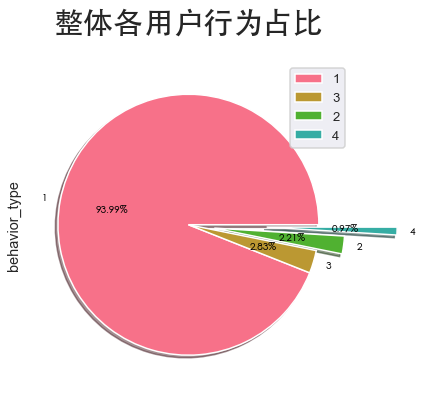

In [29]:
plot_pie_of_behavior(behavior_types, title="整体各用户行为占比")

In [30]:
statistics_infos = defaultdict(list)
statistics_infos

defaultdict(list, {})

In [31]:
statistics_infos['behavior_types'].append(behavior_types)

In [32]:
# 第一个chunks有799个用户
statistics_infos['NumOfUsers'].append(train_users['user_id'].nunique())
statistics_infos['NumOfUsers']

[799]

In [33]:
# 第一个chunks有799个用户对5364个类目有行为
statistics_infos['NumofItemCate'].append(train_users['item_category'].nunique())
statistics_infos['NumofItemCate']

[5364]

In [34]:
# 第一个chunks有799个用户对336889个商品有行为
statistics_infos['NumofItems'].append(train_users['item_id'].nunique())
statistics_infos['NumofItems']

[336889]

### 1.2.2 每日转化率可视化
下单人数/浏览人数

In [35]:
# 计算转化率
CVR = behavior_types[4] / behavior_types.sum()
print("整体转化率: %.2f%%" % (CVR * 100))

整体转化率: 0.97%


In [36]:
# 统计每日频数
daily_behav = pd.pivot_table(train_users, index='date', columns='behavior_type', values='user_id', aggfunc='count')
daily_behav.head(2)

behavior_type,1,2,3,4
date,,,,
2014-11-18,27925,635,904,316
2014-11-19,27123,646,747,233


In [37]:
daily_behav['CVR'] = daily_behav[4] / daily_behav.sum(axis=1)

In [38]:
daily_behav.head(2)

behavior_type,1,2,3,4,CVR
date,,,,,
2014-11-18,27925,635,904,316,0.010611
2014-11-19,27123,646,747,233,0.008105


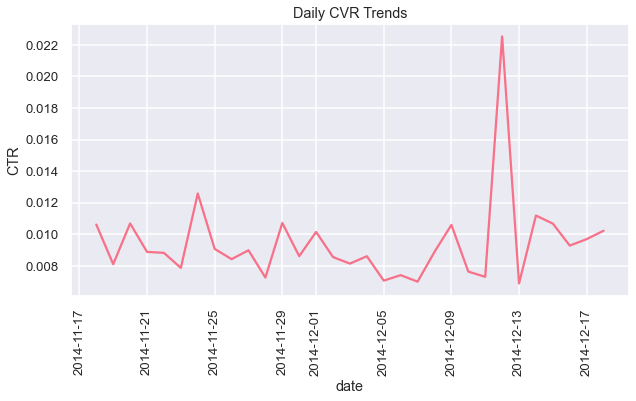

In [39]:
plt.figure(figsize=(10, 5))
daily_behav['CVR'].plot(kind='line', rot=90, ylabel='CTR')
plt.title("Daily CVR Trends")
plt.show()

In [40]:
# 指定从内存中删除behavior_types
del behavior_types
# 执行上述操作
gc.collect()

5303

### 1.2.2 时间规律统计——每日用户行为总量可视化对比

In [41]:
count_day = train_users['date'].value_counts().sort_index()
count_day[:1]

2014-11-18    29780
Name: date, dtype: int64

In [42]:
# Series转为DataFrame
count_day = pd.DataFrame(count_day)

In [43]:
count_day.columns = ['daily_freq']

In [44]:
count_day.head(2)

,daily_freq
2014-11-18,29780
2014-11-19,28749


In [45]:
# index从字符类型转为DatetimeIndex
count_day.index = pd.to_datetime(count_day.index)

In [46]:
count_day.index[:4]

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21'], dtype='datetime64[ns]', freq=None)

In [47]:
# 转为DatetimeIndex后，可以通过字符串进行索引
count_day.loc['2014-12-12']

daily_freq    55379
Name: 2014-12-12 00:00:00, dtype: int64

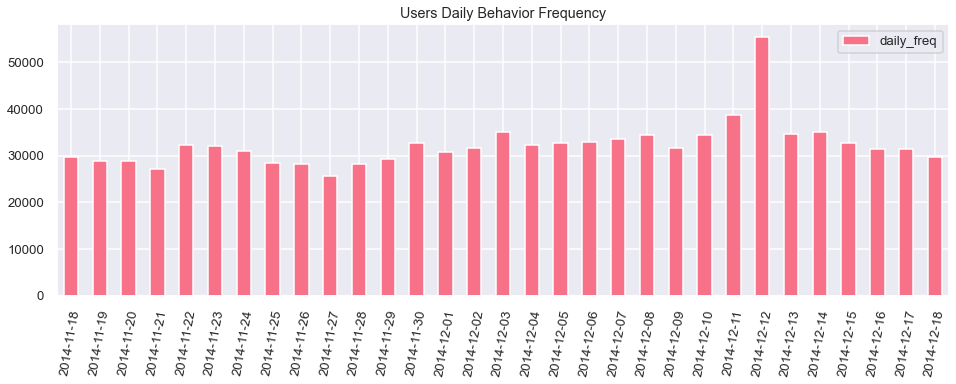

In [48]:
def show_daily_behabior_freq(count_day, isdate=True, title='Users Daily Behavior Frequency'):
    """绘制每日用户行为总频数条形图; 
    isdate:bool, 默认True,表示x坐标轴显示日期;False,表示x坐标轴显示周名称
    """
    # 设置字体和字号
    sns.set_context(context='talk', font_scale=0.8)
    # 设置图片风格
    sns.set_style(style='darkgrid')
    # 设置调色盘
    sns.set_palette(palette='husl')
    """
    与count_day.plot()代码等价
    plt.figure(figsize=(10, 8))
    plt.bar(range(count_day.shape[0]), count_day['daily_freq'])
    # 设置x轴文本刻度
    plt.xticks(range(count_day.shape[0]), count_day.index.day_name(), rotation=90)
    plt.title('User Daily Active Frequency')
    """

    count_day.plot(kind='bar',
                   rot=45,
                   figsize=(16, 5),
                   use_index=False,
                   title=title)
    if isdate:
        plt.xticks(range(count_day.shape[0]), count_day.index.date, rotation=80)
    else:
        plt.xticks(range(count_day.shape[0]), count_day.index.day_name(), rotation=80)
    plt.show()
    
    
show_daily_behabior_freq(count_day, isdate=True)

周末用户活跃度较高。另外双十二当天(数据集最后一个Friday)数据偏高。

In [49]:
del count_day
gc.collect()

5868

### 1.2.3 时间规律统计——每日加购、收藏、下单量可视化对比
用户行为类型：浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4

- 1.2.1饼图中，可知浏览行为占比93%以上，可判断浏览行为的每日频数与每日整体行为频数趋势基本一致。且由于浏览行为频数过高，导致其他行为可视化时不清晰，故下面可视化时不绘制浏览行为，只绘制加购、收藏和下单在每一天的频数统计图。以下两种绘制方法都可以实现可视化目的：
    - 第一种：sns.countplot绘制水平条形图，但图占据篇幅太大，所以换了第二种；
    - 第二种：sns.catplot的绘制方法，每个用户行为绘制一个子图，考虑坐标轴刻度尽可能简洁，故按day统计，为了让它将11月的18日与12月的18日的数据分开统计，所以按月分组。

In [50]:
"""
方法1：按日期统计各行为频数并可视化——水平条形图，不包括浏览行为
plt.figure(figsize=(10, 30))
sns.countplot(
    y='date', 
    hue='behavior_type', 
    order=dateindex.date, 
    data=train_users[train_users['behavior_type'] != 1])

plt.show()
"""


"\n方法1：按日期统计各行为频数并可视化——水平条形图，不包括浏览行为\nplt.figure(figsize=(10, 30))\nsns.countplot(\n    y='date', \n    hue='behavior_type', \n    order=dateindex.date, \n    data=train_users[train_users['behavior_type'] != 1])\n\nplt.show()\n"

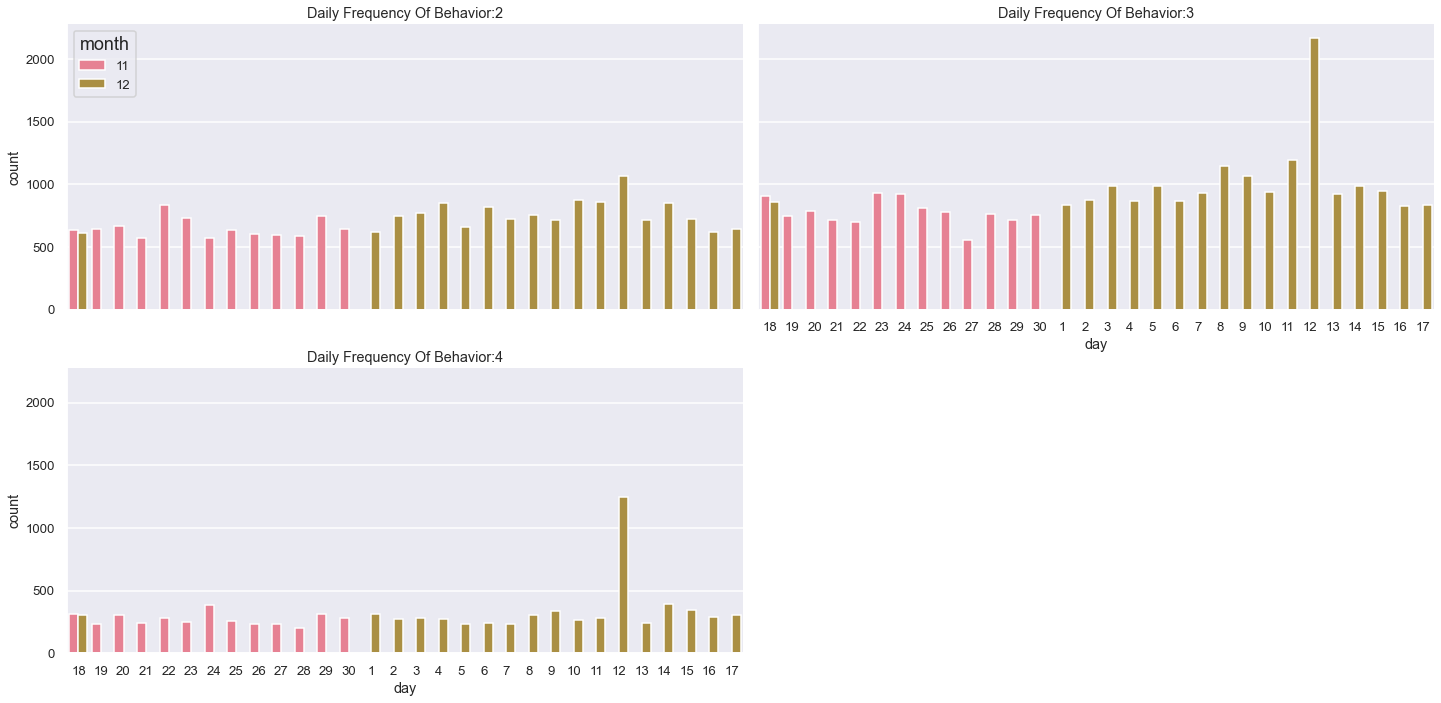

In [51]:
# 方法2：玫红色为11月，橄榄绿是12月
g = sns.catplot(x="day",
                hue="month",  # 分组统计的字段
                col="behavior_type",  #  子图分类字段
                data=train_users[train_users['behavior_type'] != 1], # 不绘制浏览行为的统计图
                kind="count",  # 绘制countplot
                col_wrap=2,    # 每列最多2个子图
                legend_out=False,    # 默认True，表示图像自动扩展、图例显示在右侧中间位置；设置False，代表显示在图像中
                height=5,   # 图像高度
                aspect=2,   # aspect * height 代表一个子图的宽度
                order=list(range(18, 31)) + list(range(1, 18)))
g.set_titles(col_template="Daily Frequency Of Behavior:{col_name}",
             row_template="{row_name}")
plt.show()

In [52]:
print(calendar.month(2014, 11))
print(calendar.month(2014, 12))

   November 2014
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30

   December 2014
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



- 与浏览行为一样，在双十二当天，不管是收藏、加购、下单的频数也都是最高的；
- 12月18日的收藏行为与11月18日的收藏行为频数十分接近，有意思的是，加购、下单的频数也是同样的表现，**那会不会12月19日会和11月19日的数据接近但略低呢？**等待后续预测后验证。

### 1.2.4 时间规律统计——每周收藏、加购、下单次数可视化对比

In [53]:
daily_behav['time'] = dateindex
weekly_behav = daily_behav.resample('W', on='time').sum()
weekly_behav

behavior_type,1,2,3,4,CVR
time,,,,,
2014-11-23,168247,4082,4773,1634,0.054965
2014-11-30,191810,4371,5299,1915,0.065637
2014-12-07,215359,5189,6345,1854,0.056907
2014-12-14,246730,5837,8425,3063,0.075012
2014-12-21,117772,2588,3460,1247,0.039866


In [54]:
temp = weekly_behav.drop(columns=[1, 'CVR'])
temp

behavior_type,2,3,4
time,,,
2014-11-23,4082,4773,1634
2014-11-30,4371,5299,1915
2014-12-07,5189,6345,1854
2014-12-14,5837,8425,3063
2014-12-21,2588,3460,1247


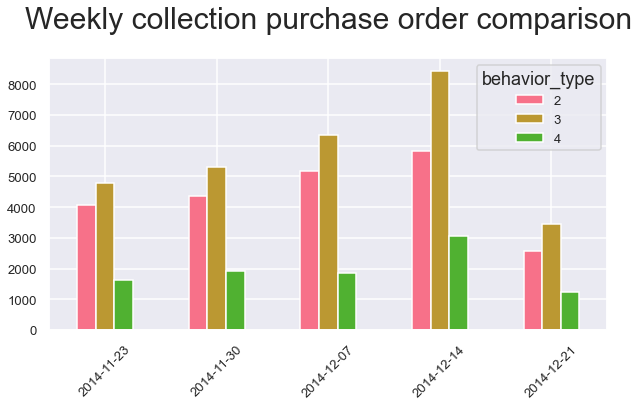

In [55]:
ax = temp.plot(kind='bar', use_index=False, figsize=(10, 5), rot=45)
ax.set_title("Weekly collection purchase order comparison", fontsize=30, pad=30)
plt.xticks(range(5), temp.index.date)
plt.show()

In [56]:
del temp
del daily_behav
del weekly_behav
gc.collect()

33

最后一周数据只到12月18日，因此着重看双十二之前的数据。双十二之前，每周的收藏、加购都在增加，下单量浮动不大。

### 1.2.5 时间规律统计——双十二当天每小时用户行为变化对比

In [57]:
all_double12 = train_users.loc['2014-12-12']
all_double12.shape

(55379, 10)

In [58]:
all_double12.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,year,month,day,date
time,,,,,,,,,,
2014-12-12 12:00:00,10001082,4368907,1,unknown,5503,2014-12-12 12:00:00,2014,12,12,2014-12-12
2014-12-12 12:00:00,10001082,4368907,1,unknown,5503,2014-12-12 12:00:00,2014,12,12,2014-12-12


In [59]:
# 每小时用户行为统计
hourly_behav = all_double12.set_index('date').pivot_table(
    index='time', columns='behavior_type', aggfunc='count')['day']
hourly_behav.head(2)

behavior_type,1,2,3,4
time,,,,
2014-12-12 00:00:00,3570,26,251,190
2014-12-12 01:00:00,1327,23,64,47


#### 1.2.5.1 每小时浏览量可视化

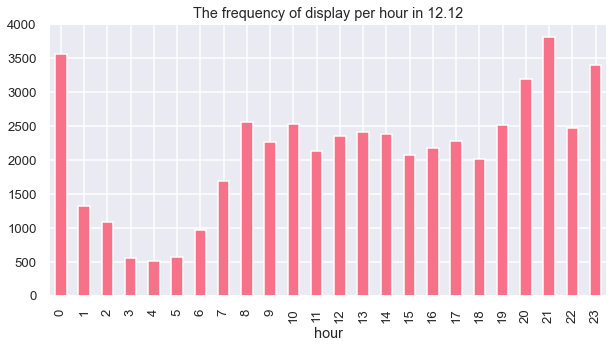

In [60]:
hourly_behav[1].plot(
    kind='bar',
    xticks=hourly_behav.index.hour,
    figsize=(10, 5),
    xlabel='hour',
    title="The frequency of display per hour in 12.12")
plt.show()

#### 1.2.5.2 每小时收藏、加购、下单量可视化

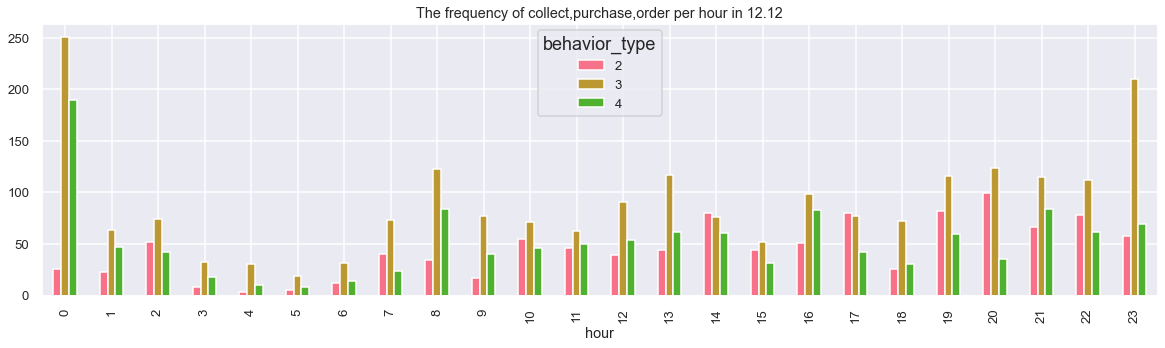

In [61]:
ax = hourly_behav[[2, 3, 4]].plot(
    kind='bar',
    xticks=hourly_behav.index.hour,
    figsize=(20, 5),
    xlabel='hour',
    title="The frequency of collect,purchase,order per hour in 12.12")
plt.show()

在0点，有仅限0-1点之间的秒杀和限时折扣，所以加购数和下单数均为当天的顶峰，说明这些策略对用户消费的刺激性非常明显；    
1点开放预定订单支付通道，1、2点2个时段的下单数几乎持平；    
3点、4点用户逐渐休息了，各行为频率均在下降；
5点开始，慢慢上升，到8点人们起床后利用上班前的间隙，又下单了一波，因此加购、下单数在8点达到小高峰；    
9点-14点，上班期间，浏览数在2000-2500之间浮动，下单数在缓慢上升；    
15点虽然收藏、加购、下单数较前个时段都在下降，但浏览数仍在2000以上，也许用户仍在继续寻找想要的商品，也许用户开始进入观望阶段，需要点刺激；
16点下单数明显增加；     

17点、18点浏览数仍在2000以上，这个时段处于准备下班或在下班路上继续浏览，所以这个阶段下单数在下降；     

19点开始，下班吃完饭，开始继续购物；19点-21点浏览量在逐步增加，到21点浏览量达到当天顶峰；下单数也是19点后最高的时段。    

22点之后，浏览数、下单数先降后升。

#### 1.2.5.3 每小时转化率可视化

In [62]:
# 计算每小时转化率
hourly_behav['CVR'] = hourly_behav[4] / hourly_behav.sum(axis=1)

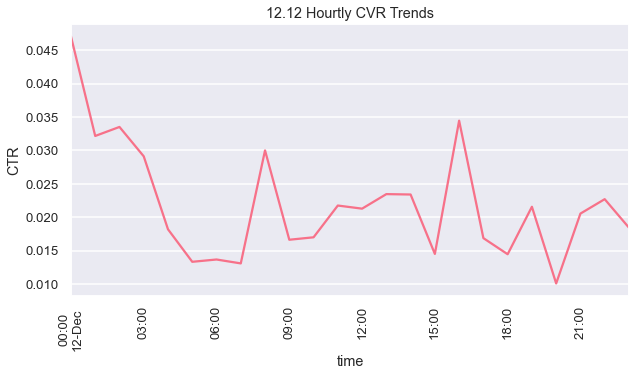

In [63]:
plt.figure(figsize=(10, 5))
hourly_behav['CVR'].plot(kind='line', rot=90, ylabel='CTR')
plt.title("12.12 Hourtly CVR Trends")
plt.show()

## 1.3 获取商品子集

### 1.3.1 读取数据集

In [64]:
train_items = pd.read_csv(item_path)
train_items.head(1)

,item_id,item_geohash,item_category
0,100002303,NaN,3368


In [65]:
train_items.shape

(620918, 3)

In [66]:
# 商品子集中有422858个商品
train_items['item_id'].nunique()

422858

In [67]:
# 商品子集中有422858个品类
train_items['item_category'].nunique()

1054

### 1.3.2 获取对商品子集有行为的用户数据集

In [68]:
# 商品子集与用户集的inner拼接
train_subui =  train_users.merge(train_items, on='item_id')
train_subui.head(1)

,user_id,item_id,behavior_type,user_geohash,item_category_x,time,year,month,day,date,item_geohash,item_category_y
0,10001082,275221686,1,unknown,10576,2014-12-03 01:00:00,2014,12,3,2014-12-03,NaN,10576


In [69]:
# 两列完全相同，只保留一列
(train_subui['item_category_x'] == train_subui['item_category_y']).sum()

221219

In [70]:
train_subui = train_subui.drop(columns=['item_category_y'])

In [71]:
train_subui['user_id'].nunique()

798

In [72]:
train_subui = train_subui.set_index('time')

100W的用户数据集中的799个用户里，有798个用户对该商品子集有行为，涵盖面比较全。

In [73]:
del train_items
gc.collect()

11256

### 1.3.3 商品子集的用户各行为占比

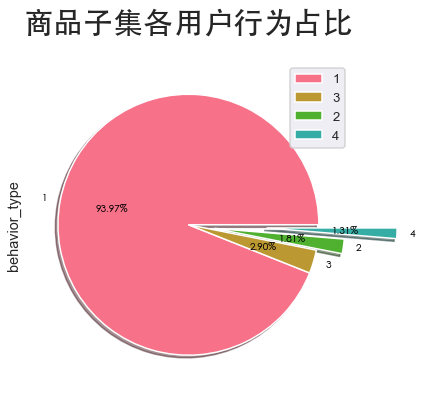

In [74]:
plot_pie_of_behavior(train_subui['behavior_type'].value_counts(), '商品子集各用户行为占比')

In [75]:
# 透视表统计每日用户各行为频数
count_day_sub = pd.pivot_table(train_subui,
                               index=train_subui.index.date,
                               columns='behavior_type',
                               values='user_id',
                               aggfunc='count')

In [76]:
count_day_sub.head(2)

behavior_type,1,2,3,4
2014-11-18,2468,84,46,29
2014-11-19,2203,33,53,25


In [77]:
count_day_sub.index = dateindex

### 1.3.4 商品子集每日用户行为总量可视化

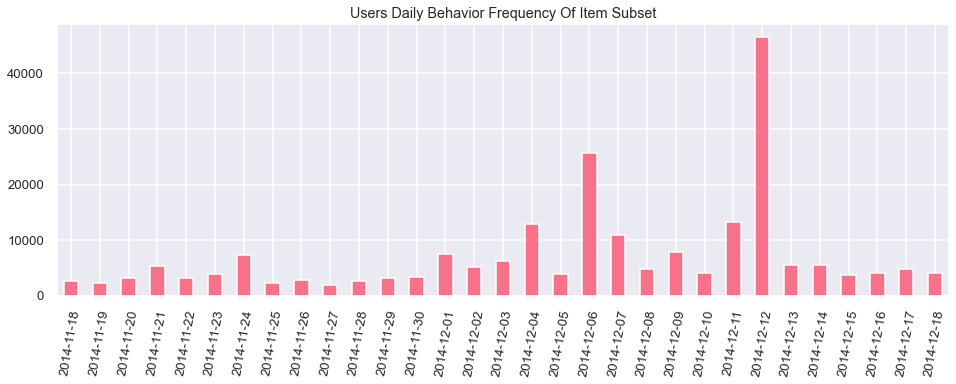

In [78]:
show_daily_behabior_freq(count_day_sub.sum(axis=1), title='Users Daily Behavior Frequency Of Item Subset')

### 1.3.5 商品子集每日浏览、收藏、加购、下单可视化

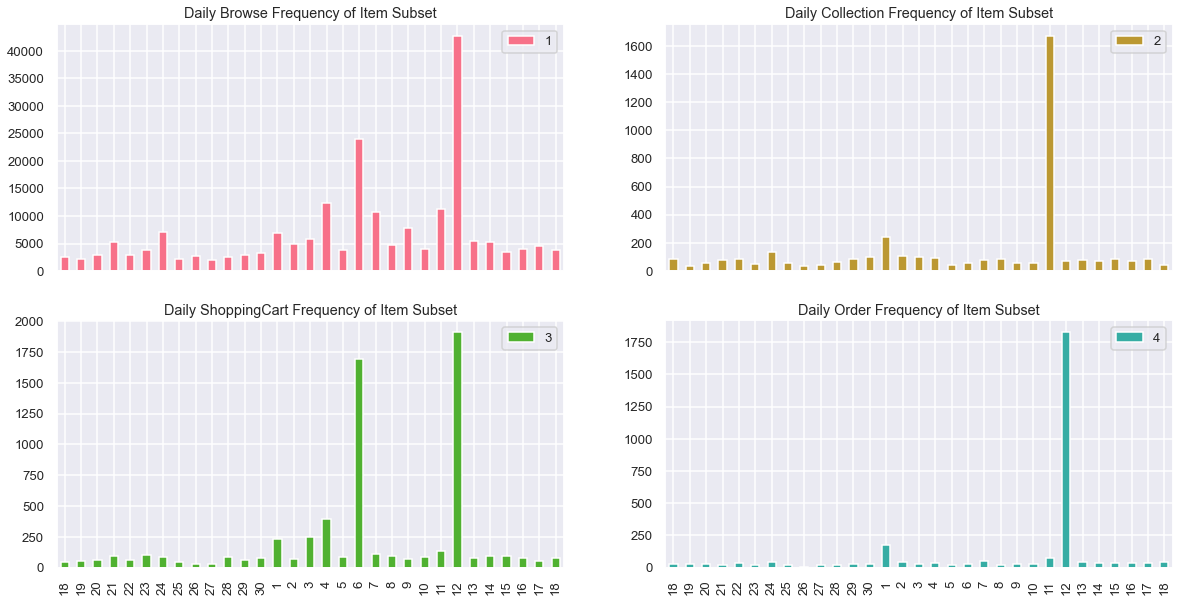

In [79]:
# 绘制方法1：
# show_daily_behabior_freq(count_day_sub,
#                          title='Users Daily Colletion,Shopping-Cart,Order Frequency Of Item Subset')

# 绘制方法2：
title = [
    "Daily Browse Frequency of Item Subset",
    "Daily Collection Frequency of Item Subset",
    "Daily ShoppingCart Frequency of Item Subset",
    "Daily Order Frequency of Item Subset"
]
axes_arr = count_day_sub.plot(kind='bar',
                              subplots=True,
                              layout=(2, 2),
                              title=title,
                              sharex=True,
                              use_index=False,
                              figsize=(20, 10))

axes_arr[0, 0].set_xticklabels(count_day_sub.index.day)
plt.show()

这个chunk的用户数据集和商品子集交集后的数据，除了浏览量外，其他行为的数据主要集中在了双十二当天，这看起来分布和总数据集非常不同，怎么样保证在预测时不影响结果呢？待后面预测的时候注意。